In [12]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
def load_csv_as_df(file_name, sub_directories, column_numbers=None, column_names=None):
    '''
    Load any csv as a pandas dataframe. Provide the filename, the subdirectories, and columns to read(if desired).
    '''
    base_path = os.getcwd()
    full_path = base_path + sub_directories + file_name

    if column_numbers is not None:
        df = pd.read_csv(full_path, usecols=column_numbers)
    else:
        df = pd.read_csv(full_path)

    if column_names is not None:
        df.columns = column_names

    return df

In [3]:
train_df = load_csv_as_df('all-train-to-air-routes-with-cells.csv', '/')
air_df = load_csv_as_df('all-air-to-train-routes-with-cells.csv', '/')

In [5]:
train_route_ids = train_df['route_number'].unique()
air_route_ids = air_df['route_number'].unique()

print(len(train_route_ids))
print(len(air_route_ids))

44
26


In [9]:
def find_routes_with_ten_readings(df, route_numbers, min_num_readings=10):
    routes = []
    
    for number in route_numbers:
        route_df = df[df['route_number'] == number]
        
        if len(route_df) >= min_num_readings:
            routes.append(route_df)
        else:
            print('Route: ', number, ' only has ', len(route_df), ' readings!')
    
    print('Found ', len(routes), ' routes that have 10+ readings')
    
    return pd.concat(routes)

In [10]:
sample = find_routes_with_ten_readings(train_df, train_route_ids, min_num_readings=10)

Route:  5191  only has  2  readings!
Route:  5195  only has  2  readings!
Route:  5196  only has  2  readings!
Route:  5197  only has  2  readings!
Route:  5198  only has  2  readings!
Route:  5199  only has  2  readings!
Route:  11923  only has  4  readings!
Route:  37118  only has  8  readings!
Route:  84726  only has  2  readings!
Route:  84727  only has  2  readings!
Route:  84728  only has  2  readings!
Route:  84729  only has  2  readings!
Route:  84730  only has  2  readings!
Route:  84731  only has  2  readings!
Route:  84740  only has  2  readings!
Route:  84741  only has  2  readings!
Route:  84742  only has  2  readings!
Route:  84743  only has  2  readings!
Route:  84744  only has  2  readings!
Route:  84745  only has  2  readings!
Route:  84746  only has  2  readings!
Route:  84747  only has  2  readings!
Route:  84748  only has  2  readings!
Route:  84749  only has  2  readings!
Route:  84750  only has  2  readings!
Route:  84751  only has  2  readings!
Route:  84754  onl

In [11]:
sample2 = find_routes_with_ten_readings(air_df, air_route_ids, min_num_readings=10)

Route:  46836  only has  2  readings!
Route:  46842  only has  5  readings!
Route:  46844  only has  2  readings!
Route:  122063  only has  2  readings!
Route:  384940  only has  3  readings!
Found  21  routes that have 10+ readings


In [16]:
def plot_route(df, route_number):
    route_data = df[df['route_number'] == route_number]

    long = route_data['longitude'].tolist()
    lat = route_data['latitude'].tolist()

    plt.plot(long, lat, color='r')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Route ' + str(route_number))
    plt.show()

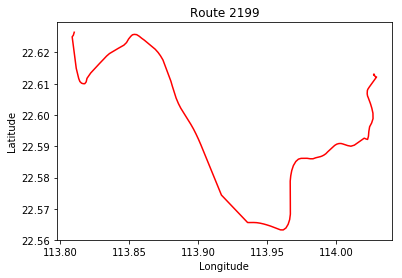

In [17]:
plot_route(sample2, 2199)

In [26]:
def plot_all_routes_in(df):
    color_count = 1
    cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
    route_numbers = df['route_number'].unique()

    for route_number in route_numbers:
        route_data = df[df['route_number'] == route_number]

        long = route_data['longitude'].tolist()
        lat = route_data['latitude'].tolist()
        
        plt.plot(long, lat, color='r') #cycle[color_count])
        color_count += 1
    
    plt.show()

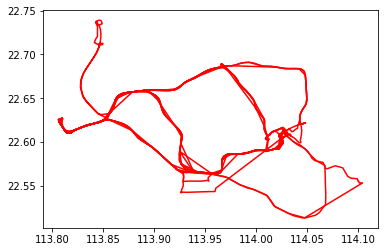

In [27]:
plot_all_routes_in(sample2)

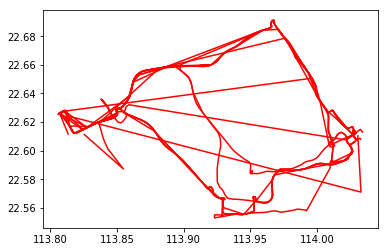

In [28]:
plot_all_routes_in(sample)